# Initial Data Exploration on SF Crimes

### Part 1 - Define the problem 

As seen on Kaggle's competition <a href="https://www.kaggle.com/c/sf-crime/overview">link</a> 

"From 1934 to 1963, San Francisco was infamous for housing some of the world's most notorious criminals on the inescapable island of Alcatraz.

Today, the city is known more for its tech scene than its criminal past. But, with rising wealth inequality, housing shortages, and a proliferation of expensive digital toys riding BART to work, there is no scarcity of crime in the city by the bay.

From Sunset to SOMA, and Marina to Excelsior, this competition's dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods. Given time and location, you must predict the category of crime that occurred.

We're also encouraging you to explore the dataset visually."

**Here the focus of the project will be to deploy a model and create a frontend that the model serves. Here the prime learning objective for me is to learn how and where machine learning models have it's place in production.**

Problem areas: Public Services and Administration

Libraries:auto-sklearn, pandas, matplotlib


Project focus area: Model creation and deployment

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time 
#import gmplot
%matplotlib inline

In [2]:
# Load the data in dataframes for train and test
train_df = pd.read_csv("~/Documents/GitHub/SFCrimePrediction/data/raw/train.csv")
test_df = pd.read_csv("~/Documents/GitHub/SFCrimePrediction/data/raw/test.csv")

In [3]:
#Get the shapes of the data 
train_df.shape

(878049, 9)

In [4]:
test_df.shape

(884262, 7)

We see that there are two columns missing in the test data lets compare which ones are missing.

In [5]:
train_df.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [6]:
test_df.columns

Index(['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')

We see that Description of the Crime and the Category column on which we will be predicting are the ones which are not there in the test data set hence we will be removing the column after getting some insight into it.

In [7]:
# Describe the training dataset
train_df.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [8]:
train_df.describe()

X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000

In [9]:
train_df.describe(include='O')

Dates       Category                      Descript  \
count                878049         878049                        878049   
unique               389257             39                           879   
top     2011-01-01 00:01:00  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
freq                    185         174900                         60022   

       DayOfWeek PdDistrict Resolution                 Address  
count     878049     878049     878049                  878049  
unique         7         10         17                   23228  
top       Friday   SOUTHERN       NONE  800 Block of BRYANT ST  
freq      133734     157182     526790                   26533

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


We see that the data has no missing values but we will go into detail as to whether there are any odd values within the dataset but that also is small possibility as we know that Kaggle competition datasets are cleaned and removed of any oddities. But we do see one issue in the Longitude part of the data as we see that the data is going towards 90 which shows that the data is an outlier and needs to be removed.

Given that we know that the san francisco region is has latitude aroudd the range of 120 and the latitude for the region is around the range of 37 we can check for outliers by putting a value by just a range off the acutal coordinates  to remove the data which has wrong latitudes 


In [11]:
#Check the distribution of data greater than 40 
train_df[train_df.Y > 40]

Dates               Category  \
660485  2005-12-30 17:00:00          LARCENY/THEFT   
660711  2005-12-30 00:34:00                ASSAULT   
660712  2005-12-30 00:34:00                ASSAULT   
661106  2005-12-29 00:07:00           NON-CRIMINAL   
666430  2005-11-30 11:25:00         OTHER OFFENSES   
...                     ...                    ...   
844995  2003-06-11 08:49:00         OTHER OFFENSES   
845842  2003-06-09 09:25:00         OTHER OFFENSES   
852880  2003-05-02 01:00:00  SEX OFFENSES FORCIBLE   
857248  2003-04-14 16:30:00                ROBBERY   
871198  2003-02-05 12:00:00          LARCENY/THEFT   

                                     Descript  DayOfWeek  PdDistrict  \
660485           GRAND THEFT FROM LOCKED AUTO     Friday  TENDERLOIN   
660711            INFLICT INJURY ON COHABITEE     Friday     BAYVIEW   
660712   AGGRAVATED ASSAULT WITH BODILY FORCE     Friday     BAYVIEW   
661106           AIDED CASE, MENTAL DISTURBED   Thursday  TENDERLOIN   
666430                      TRAFFIC VIOLATION  Wednesday  TENDERLOIN   
...                                       ...        ...         ...   
844995  DRIVERS LICENSE, SUSPENDED OR REVOKED  Wednesday   INGLESIDE   
845842  DRIVERS LICENSE, SUSPENDED OR REVOKED     Monday   INGLESIDE   
852880            FORCIBLE RAPE, BODILY FORCE     Friday    SOUTHERN   
857248       ROBBERY ON THE STREET, STRONGARM     Monday     BAYVIEW   
871198           PETTY THEFT FROM LOCKED AUTO  Wednesday    SOUTHERN   

                              Resolution  \
660485                              NONE   
660711                    ARREST, BOOKED   
660712                    ARREST, BOOKED   
661106                 PSYCHOPATHIC CASE   
666430                     ARREST, CITED   
...                                  ...   
844995                     ARREST, CITED   
845842                     ARREST, CITED   
852880  COMPLAINANT REFUSES TO PROSECUTE   
857248  COMPLAINANT REFUSES TO PROSECUTE   
871198                              NONE   

                                        Address      X     Y  
660485              5THSTNORTH ST / OFARRELL ST -120.5  90.0  
660711          JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0  
660712          JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0  
661106                  5THSTNORTH ST / EDDY ST -120.5  90.0  
666430                 5THSTNORTH ST / ELLIS ST -120.5  90.0  
...                                         ...    ...   ...  
844995  JAMES LICK FREEWAY HY / CESAR CHAVEZ ST -120.5  90.0  
845842  JAMES LICK FREEWAY HY / CESAR CHAVEZ ST -120.5  90.0  
852880           3RD ST / JAMES LICK FREEWAY HY -120.5  90.0  
857248                     GILMAN AV / FITCH ST -120.5  90.0  
871198      SPEAR ST / THE EMBARCADERO SOUTH ST -120.5  90.0  

[67 rows x 9 columns]

We see that 67 rows have latitude greater than 40 so we need to remove those 

In [12]:
train_df[train_df.Y < 40].to_csv("~/Documents/GitHub/SFCrimePrediction/data/interim/train_outlier_removed.csv")
train_df= train_df[train_df.Y < 40] # Removed the outliers and saved to a file in the interim folder

In [13]:
map_image = plt.imread("map.png")

*Visualizing the data now on a preloaded map image*

The map image is saved in figures and this article is the way I did the plotting for the mapping:<a href="https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db">Link</a>

In [14]:
BBox=[train_df.X.min(),train_df.X.max(),train_df.Y.min(),train_df.Y.max()]

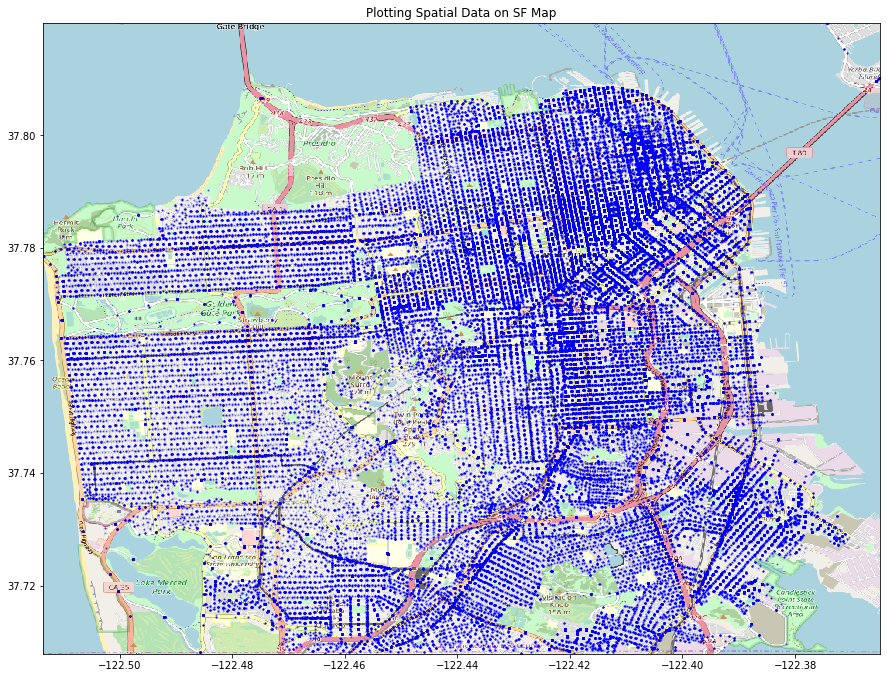

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(train_df.X,train_df.Y,zorder=1,alpha=0.2,c='b',s=1)
ax.set_title('Plotting Spatial Data on SF Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map_image, zorder=0, extent = BBox, aspect= 'equal')

We see that crime is pretty present across all the districts and areas with a few areas being very dense.

Let us see which of the values in each of the colum dominate the crime lists

In [16]:
def plot_correlation_map(df,X,Y,hue):
#     colors={}
#     for value in df[hue].unique():
#         print(c)
#         colors[value] = "#"+(hex(c).replace("0x","")).zfill(6)
#     print(colors)
    fig,ax = plt.subplots(figsize=(15,15))
    for value in df[hue].unique():
        temp = df[df[hue]==value]
        ax.scatter(temp[X], temp[Y],zorder=1,alpha=0.2,s=1,label=value)
    ax.imshow(map_image, zorder=0, extent = BBox, aspect= 'equal')
    plt.legend(markerscale=6)

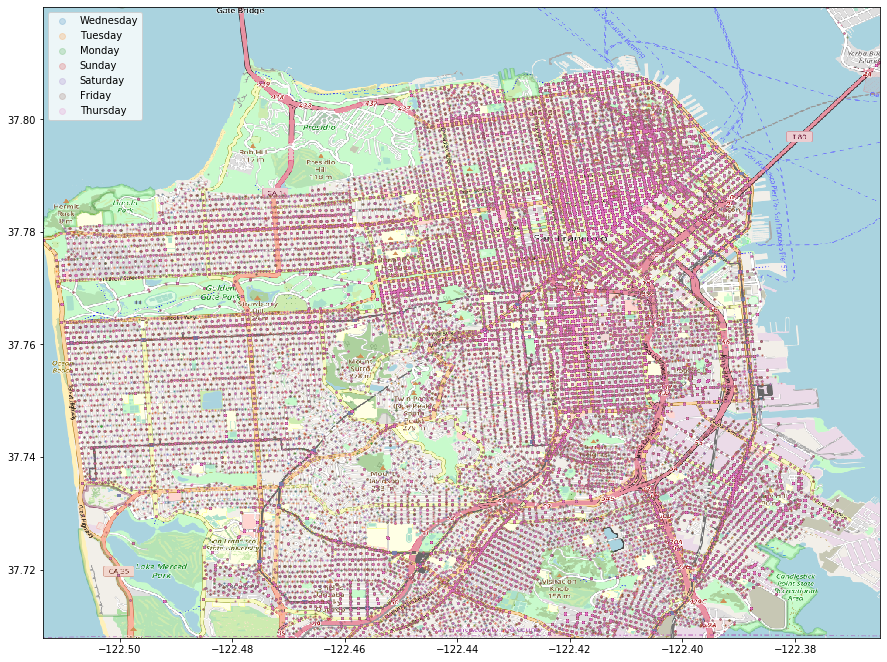

In [17]:
plot_correlation_map(train_df,'X','Y','DayOfWeek')

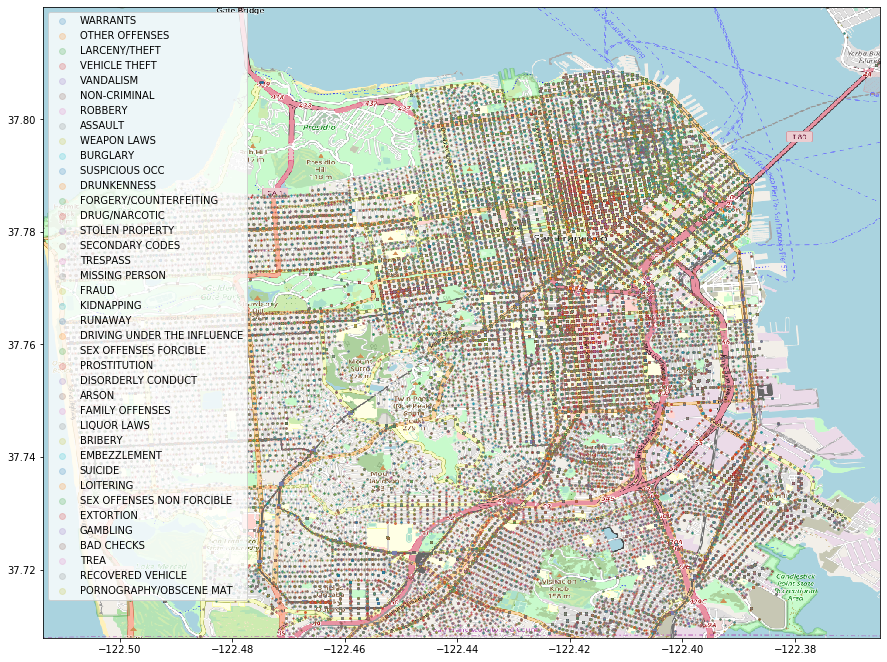

In [18]:
plot_correlation_map(train_df,'X','Y','Category')

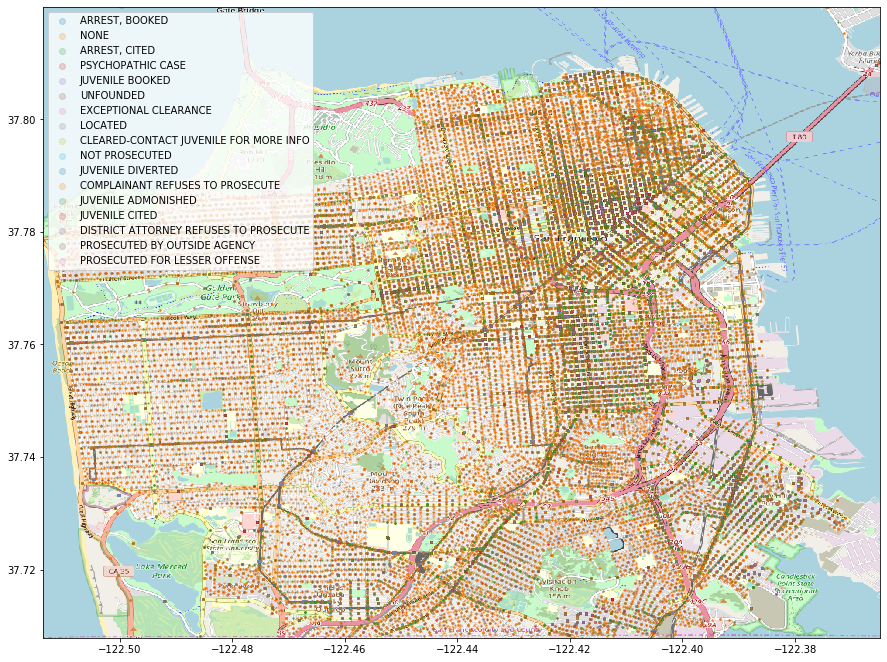

In [19]:
plot_correlation_map(train_df,'X','Y','Resolution')

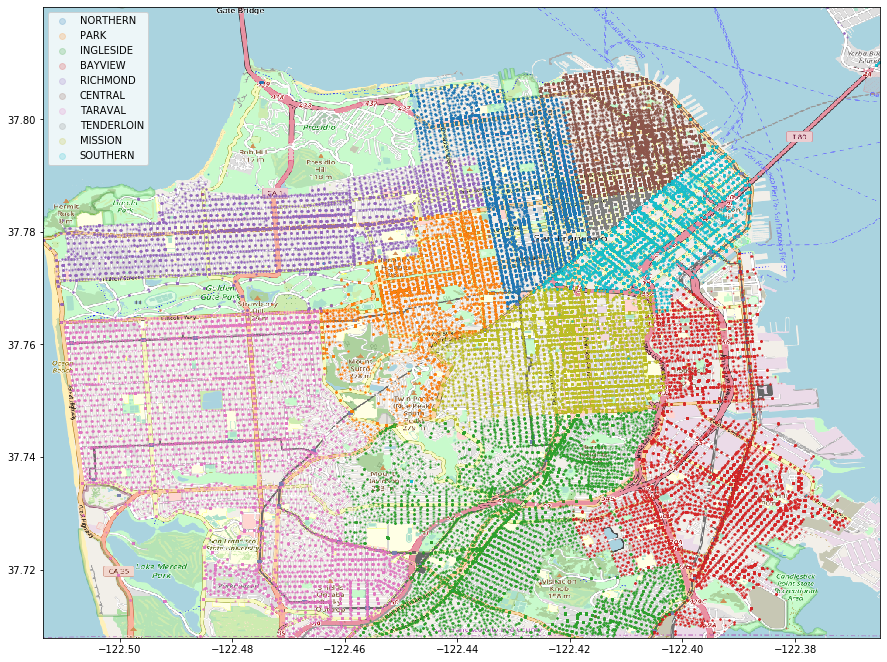

In [20]:
plot_correlation_map(train_df,'X','Y','PdDistrict')

In [21]:
#Find unique values to see whether we can drop features or not
def print_unique_value_counts(df,column):
    if type(df) == type(pd.DataFrame()):
        if type(column) == str :
            print("The number of unique values in {} are {}".format(column,len(df[column].unique())))
        else:
            print("Enter only a single column name only")
    else:
        print("Pass a dataframe")

In [22]:
print_unique_value_counts(train_df,"Address")

The number of unique values in Address are 23191


In [23]:
print_unique_value_counts(train_df,"PdDistrict")

The number of unique values in PdDistrict are 10


In [24]:
print_unique_value_counts(train_df,"Category")

The number of unique values in Category are 39


In [25]:
print_unique_value_counts(train_df,"DayOfWeek")

The number of unique values in DayOfWeek are 7


In [26]:
print_unique_value_counts(train_df,"Resolution")

The number of unique values in Resolution are 17


We see that if we one hot encode all the features the total dimension of the dataset will have a total of 23000+ features which is not an ideal solution.
We shall try to process the Address in a better way as to reduce the features.

As the feature engineering process for almost a miliion records is sequential it is painfully slow especially for the case where there is very limited processing power.
Here we will use a library called <a href="https://vaex.readthedocs.io/en/latest/">vaex</a> which has been touted to perform in memory operations at really rapid speeds.

Let us test out the performance for 10000 rows using cython vs Vaex

In [27]:
import time

In [28]:
%load_ext cython

In [29]:
%%cython -a
import numpy as np
def process_address(df,df_columns):
    df_columns = np.append(df_columns ,["street_1","street_2","block_present","block_number","block_on"])
    dim = len(df_columns)
    new_df = df_columns.reshape((dim,1))
    count = 0
    for row in df:
        count+=1
        if count ==10000:
            break
        if "/" in row[6]:
            streets = row[6].split("/")
            new_df = np.append(new_df,np.append(row,[streets[0],streets[1],0,-1,"N/A"]).reshape(dim,1),axis=1)
        elif "Block of" in row[6]:
            block_street = row[6].split("Block of")
            new_df = np.append(new_df,np.append(row,["N/A","N/A",1,int(block_street[0]),block_street[1]]).reshape(dim,1),axis=1)
        else:
            new_df = np.append(new_df,np.append(row,["N/A","N/A",0,-1,"N/A"]).reshape(dim,1),axis=1)
    return new_df

In [30]:
print(time.time())
process_address(train_df.values,train_df.columns.values)
print(time.time())

1581462571.1963727
1581462577.8438625


We see that it took almost 5 seconds to process only 10000 records and with increasing memory it will be much more slower when we add records which are almost 16 times the size of what we processed. Let us time the same with vaex and see if there are any performance gains 

Note that we have done the entire feature engineering of generating a purely numerical data set for the model to consume in vaex . The only major bottleneck of Vaex is that the data loading can be a bit time consuming but let's time the process and see how much time it takes to generate the data.

In [31]:
import vaex.ml as ml
import vaex as vx

ERROR:MainThread:vaex:issue loading reader
Traceback (most recent call last):
  File "C:\Users\Ankur Bhatkalkar\Anaconda3\lib\site-packages\vaex\__init__.py", line 720, in <module>
    add_namespace = entry.load()
  File "C:\Users\Ankur Bhatkalkar\Anaconda3\lib\site-packages\pkg_resources\__init__.py", line 2442, in load
    self.require(*args, **kwargs)
  File "C:\Users\Ankur Bhatkalkar\Anaconda3\lib\site-packages\pkg_resources\__init__.py", line 2465, in require
    items = working_set.resolve(reqs, env, installer, extras=self.extras)
  File "C:\Users\Ankur Bhatkalkar\Anaconda3\lib\site-packages\pkg_resources\__init__.py", line 791, in resolve
    raise VersionConflict(dist, req).with_context(dependent_req)
pkg_resources.VersionConflict: (pyarrow 0.13.0 (c:\users\ankur bhatkalkar\anaconda3\lib\site-packages), Requirement.parse('pyarrow>=0.15'))


In [32]:

def feature_engineer_train_test(train_path = None,test_path=None,target=None):
    df_train = None
    df_test = None
    target_column = None
    if train_path:
        try:
            df_train = vx.from_csv(train_path)
        except :
            print("Train file was not loaded correctly")
            return df_train,df_test
    else:
        print("Correct Path not provide. Please check")
        return None,None
    if test_path:
        try:
            df_test = vx.from_csv(test_path)
        except:
            print("Test file was not loaded correctly")
            return df_train,df_test
    else:
        print("Correct path not provided please check")
        return None,None
    if target:
        target_column = df_train[target]
    else:
        print("Provide a target column")
        return None,None
    
    #Get all the common columns within train and test and keep those only
    train_columns = df_train.get_column_names()
    test_columns = df_test.get_column_names()
    common_columns = [value for value in train_columns if value in test_columns]
    df_train = df_train[common_columns]
    df_test = df_test[common_columns]
    #Processing date data for both sets
    try:
        df_train["Dates"] = df_train["Dates"].astype('datetime64')
        df_test["Dates"] = df_test["Dates"].astype('datetime64')
    except:
        print("Error in processing date")
        return None,None
    
    try:
        df_train["Day"] = df_train["Dates"].dt.day
        df_train["Year"] = df_train["Dates"].dt.year
        df_train["Month"] = df_train["Dates"].dt.month
        df_train["Hour"] = df_train["Dates"].dt.hour
        df_train["Minute"] = df_train["Dates"].dt.minute
        df_test["Day"] = df_test["Dates"].dt.day
        df_test["Year"] = df_test["Dates"].dt.year
        df_test["Month"] = df_test["Dates"].dt.month
        df_test["Hour"] = df_test["Dates"].dt.hour
        df_test["Minute"] = df_test["Dates"].dt.minute
    except:
        print("Error in Date time Processing")
        return None,None
    
    try:
        df_train["street_1"] = df_train["Address"].apply(lambda x:x.split("/")[0] if "/" in x else "N/A")
        df_train["street_2"] = df_train["Address"].apply(lambda x:x.split("/")[1] if "/" in x else "N/A")
        df_train["block_present"] = df_train["Address"].apply(lambda x: 1 if "Block of" in x else 0)
        df_train["block_number"] = df_train["Address"].apply(lambda x: int(x.split("Block of")[0]) if "Block of" in x else -1)
        df_train["block_on"] = df_train["Address"].apply(lambda x: x.split("Block of")[1] if "Block of" in x else "N/A")
        df_test["street_1"] = df_test["Address"].apply(lambda x:x.split("/")[0] if "/" in x else "N/A")
        df_test["street_2"] = df_test["Address"].apply(lambda x:x.split("/")[1] if "/" in x else "N/A")
        df_test["block_present"] = df_test["Address"].apply(lambda x: 1 if "Block of" in x else 0)
        df_test["block_number"] = df_test["Address"].apply(lambda x: int(x.split("Block of")[0]) if "Block of" in x else -1)
        df_test["block_on"] = df_test["Address"].apply(lambda x: x.split("Block of")[1] if "Block of" in x else "N/A")
 
    except:
        print("Processing error in address")
        return None,None
    try:
        encoder_train = ml.OneHotEncoder(features=["DayOfWeek","street_1","PdDistrict","street_2","block_on"])
        encoder_test = ml.OneHotEncoder(features=["DayOfWeek","street_1","PdDistrict","street_2","block_on"])
        df_train = encoder_train.fit_transform(df_train)
        df_test = encoder_test.fit_transform(df_test)
    except e as Exception:
        print("There is a problem with one hot encoding")
        return None,None
    #Everything runs well till here Join the target column for
    try:
        df_train["Category"] = target_column
    except:
        print("Setting the target did not work")
        return None,None
    
    return df_train,df_test

In [33]:
print(time.time())
train_processed, test_processed = feature_engineer_train_test("~\\Documents\\GitHub\\SFCrimePrediction\\data\\raw\\train.csv","~\\Documents\\GitHub\\SFCrimePrediction\\data\\raw\\test.csv","Category")
print(time.time())

1581462578.5785024
1581462646.8990793


The entire feature engineering process consisted of:
1. Converting datetime columns to (Year,Month,Day,Hour & Minute)
2. Seperating the Address into five columns which were then one hot encoded into further features.
3. Doing this for both the train and the test dataset.

This took 62s on almost 1.6 million records!! Talk about speed.

In [34]:
train_processed.shape

(878049, 5321)

A considerable feature reduction count as we step down from having 23191 values in unique address to making it almost 1/5th the features even with one hot encoding.

In [35]:
'''
Enable garbage collection before a major chunk of feature
engineering to prevent memory Errors
'''
import gc
gc.enable()
gc.collect()

104

In [41]:
gc.collect()

20

In [45]:
train_processed.export_parquet("C:\\Users\\Ankur Bhatkalkar\\Documents\\GitHub\\SFCrimePrediction\\data\\processed\\train_processed.parquet")

In [46]:
test_processed.export_parquet("C:\\Users\\Ankur Bhatkalkar\\Documents\\GitHub\\SFCrimePrediction\\data\\processed\\test_processed.parquet")

This ends our first noteobook having some introductory data exploration and basic feature engineering. We also explored a new library Vaex which has great performance gains for datasets with large amounts of records.

The next notebook will cover another new library and a very first for me which is AutoSklearn which is a AutoML library. Again iterating on the objective of this project is to deploy a model which serves a front end hence we will look into AutoML libraries as this speeds up the process to find a good enough model and not go into too much hyperparameter optimization.

We exported the files in parquest as csv files take long to write even with chunks in the mixture and pandas has a nice read_parquet function that can be used for modelling as and when needed.